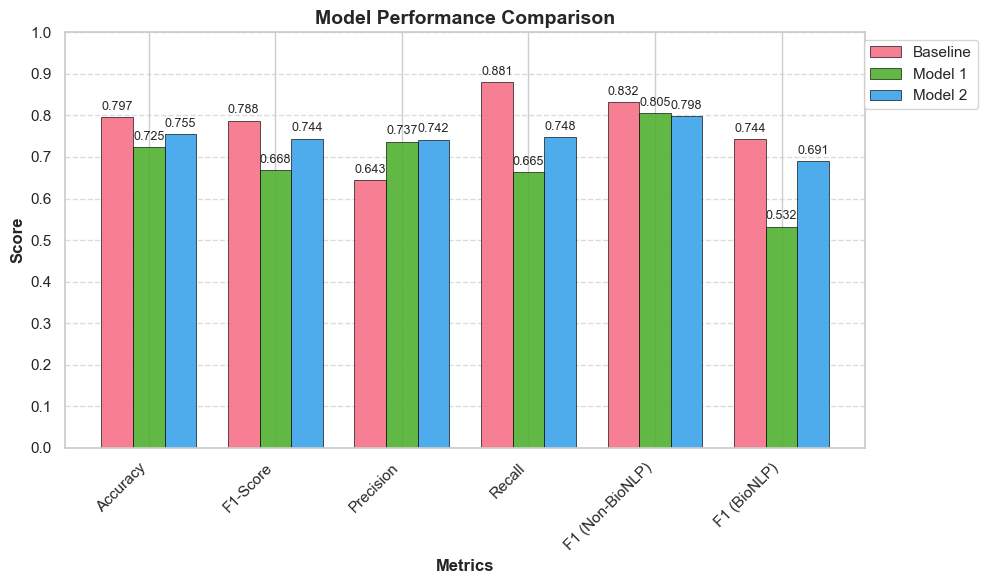

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Data
models = ['Baseline', 'Model 1', 'Model 2']
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall', 'F1 (Non-BioNLP)', 'F1 (BioNLP)']

results = {
    'Baseline': [0.7968, 0.7877, 0.6435, 0.8810, 0.8317, 0.7437],
    'Model 1': [0.7245, 0.6685, 0.7371, 0.6646, 0.8047, 0.5323],
    'Model 2': [0.7553, 0.7442, 0.7419, 0.7475, 0.7976, 0.6907]
}

# Color palette
palette = sns.color_palette("husl", len(models))

# Create grouped bar plot
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(models):
    plt.bar(x + i*width, results[model], width, label=model, color=palette[i],
            edgecolor='black', linewidth=0.5, alpha=0.9)

# Add labels and title
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x + width, metrics, rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.yticks(np.arange(0, 1.1, 0.1))

# Add value labels
for i, model in enumerate(models):
    for j, val in enumerate(results[model]):
        plt.text(j + i*width, val + 0.01, f"{val:.3f}", 
                ha='center', va='bottom', fontsize=9)

# Add legend and grid
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Save and show
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

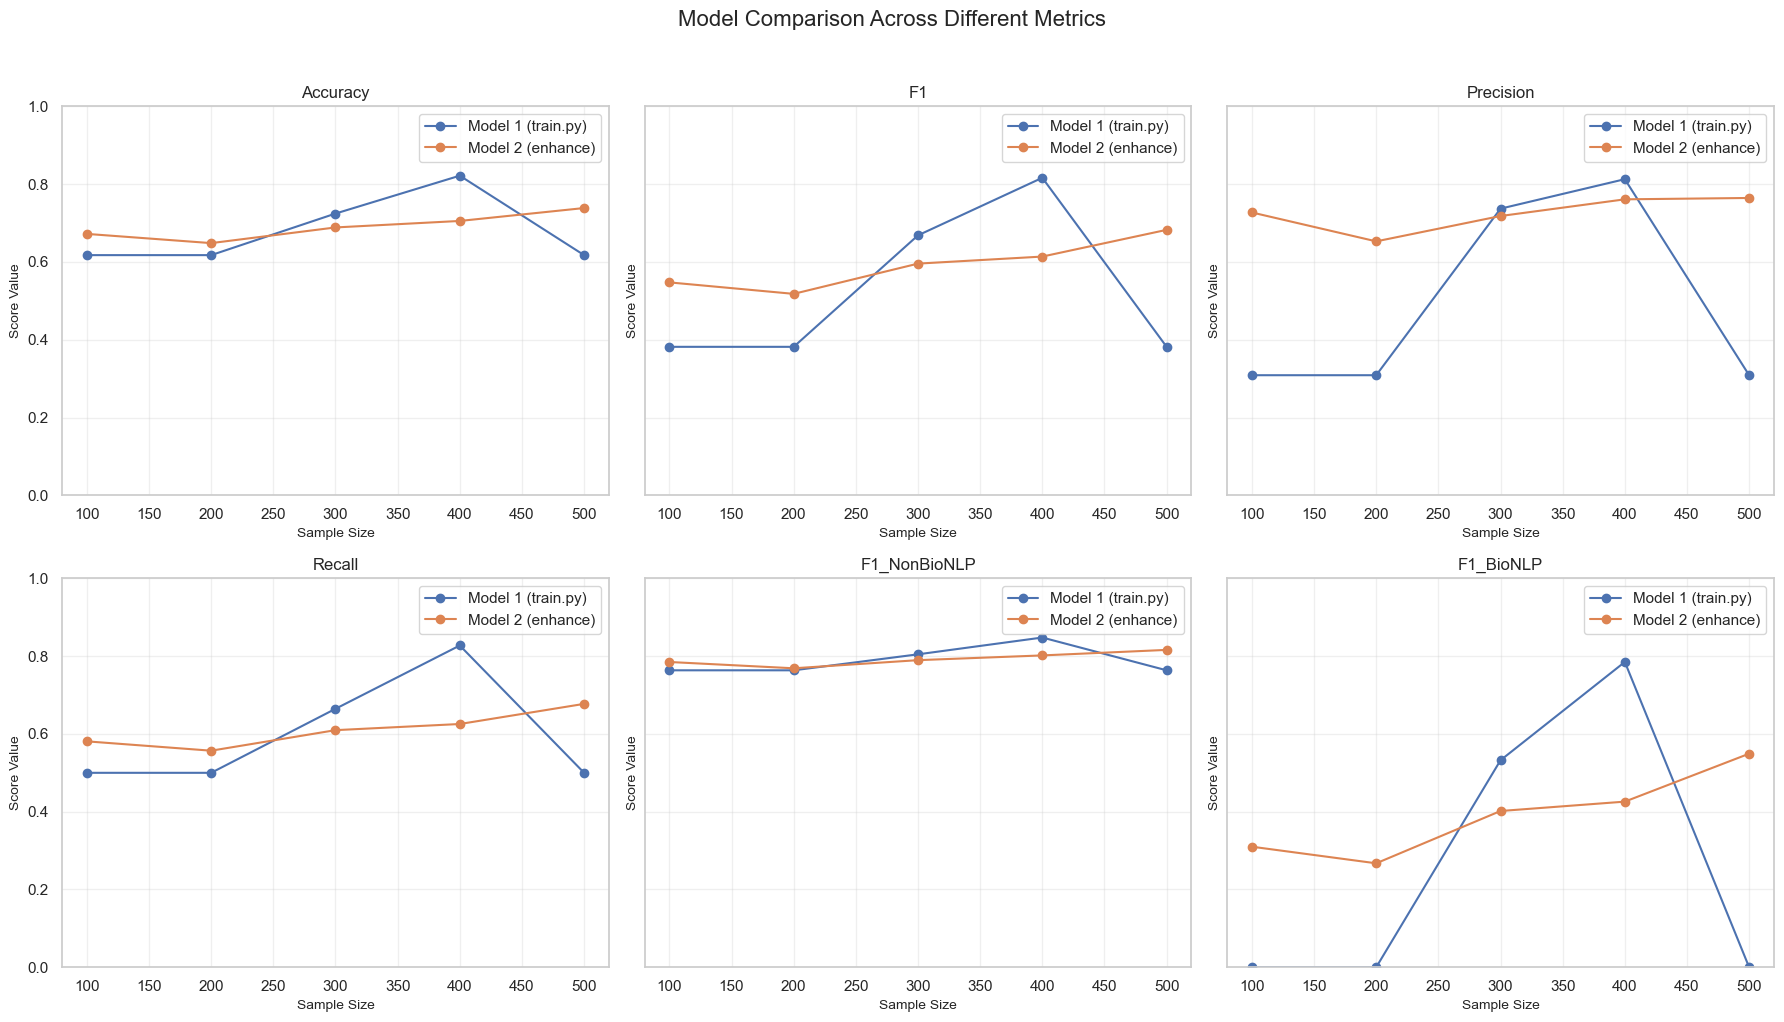

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare data
metrics = ['Accuracy', 'F1', 'Precision', 'Recall', 'F1_NonBioNLP', 'F1_BioNLP']
sample_sizes = [100, 200, 300, 400, 500]

# Model 1 (train.py) data
model1_data = {
    100: [0.6176, 0.3818, 0.3088, 0.5000, 0.7636, 0.0000],
    200: [0.6176, 0.3818, 0.3088, 0.5000, 0.7636, 0.0000],
    300: [0.7245, 0.6685, 0.7371, 0.6646, 0.8047, 0.5323],
    400: [0.8219, 0.8165, 0.8129, 0.8274, 0.8479, 0.7851],
    500: [0.6176, 0.3818, 0.3088, 0.5000, 0.7636, 0.0000]
}

# Model 2 (enhance) data
model2_data = {
    100: [0.6722, 0.5475, 0.7273, 0.5809, 0.7850, 0.3100],
    200: [0.6485, 0.5180, 0.6530, 0.5569, 0.7688, 0.2673],
    300: [0.6888, 0.5958, 0.7182, 0.6097, 0.7897, 0.4018],
    400: [0.7055, 0.6139, 0.7611, 0.6255, 0.8019, 0.4259],
    500: [0.7387, 0.6826, 0.7646, 0.6773, 0.8161, 0.5492]
}

# Create DataFrames
def create_df(model_data, model_name):
    dfs = []
    for size in sample_sizes:
        df = pd.DataFrame([model_data[size]], columns=metrics)
        df['Sample Size'] = size
        df['Model'] = model_name
        dfs.append(df)
    return pd.concat(dfs)

df1 = create_df(model1_data, 'Model 1 (train.py)')
df2 = create_df(model2_data, 'Model 2 (enhance)')
df = pd.concat([df1, df2])

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        ax.plot(sample_sizes, subset[metric], marker='o', label=model)
        
    ax.set_title(metric, fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Sample Size', fontsize=10)
    ax.set_ylabel('Score Value', fontsize=10)
    ax.legend(loc='best')
    
fig.suptitle('Model Comparison Across Different Metrics', fontsize=16, y=1.02)
fig.tight_layout()
plt.savefig('model_comparison_subplots.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\ruiwu\AppData\Local\Temp\ipykernel_30456\697585867.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics.keys(), rotation=45, ha='right', fontsize=10)


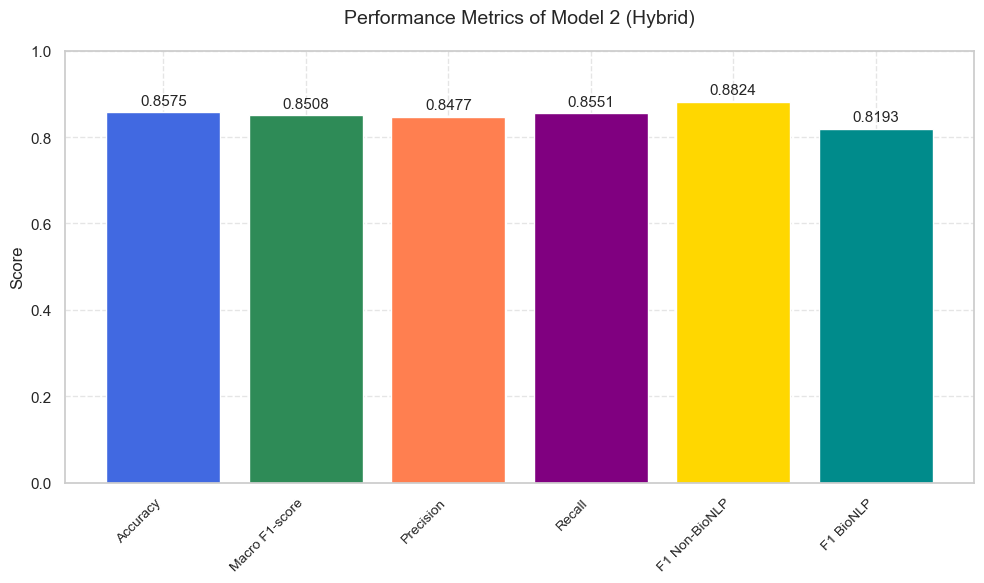

In [5]:
import matplotlib.pyplot as plt

# Data to plot
metrics = {
    "Accuracy": 0.8575,
    "Macro F1-score": 0.8508,
    "Precision": 0.8477,
    "Recall": 0.8551,
    "F1 Non-BioNLP": 0.8824,
    "F1 BioNLP": 0.8193
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot
ax.bar(metrics.keys(), metrics.values(), color=['royalblue', 'seagreen', 'coral', 'purple', 'gold', 'darkcyan'])

# Title and labels
ax.set_title('Performance Metrics of Model 2 (Hybrid)', fontsize=14, pad=20)
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0, 1)
ax.set_xticklabels(metrics.keys(), rotation=45, ha='right', fontsize=10)
ax.grid(True, linestyle='--', alpha=0.5)

# Plot values on bars
for key, value in metrics.items():
    ax.text(key, value + 0.01, f"{value:.4f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()